In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [8]:

data_url = "https://github.com/FlipRoboTechnologies/ML_-Datasets/raw/main/Loan%20Application%20Status/loan_prediction.csv"
loan= pd.read_csv(data_url,header=None)
loan



,0,1,2,3,4,5,6,7,8,9,10,11,12
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [9]:
loan.columns=['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Applicant_Income','CoapplicantIncome','Loan_Amount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
df=loan.set_index('Loan_ID')
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [12]:
print('The Shape of the dataset is',df.shape)

The Shape of the dataset is (614, 12)


In [13]:
print('The columns of the dataset are',df.columns)

The columns of the dataset are Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Applicant_Income', 'CoapplicantIncome', 'Loan_Amount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [14]:
print('The number of Duplicated rows in the dataset are',df.duplicated().sum() )

The number of Duplicated rows in the dataset are 0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   Applicant_Income   614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   Loan_Amount        592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


In [16]:
cat_cols=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='O':
        cat_cols.append(x)
print('The Object data type columns are ',cat_cols)
num_cols=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='int64' or df.dtypes[x]=='float64':
        num_cols.append(x)
print('The Numerical data type columns are ',num_cols)


The Object data type columns are  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
The Numerical data type columns are  ['Applicant_Income', 'CoapplicantIncome', 'Loan_Amount', 'Loan_Amount_Term', 'Credit_History']


In [17]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
Applicant_Income       int64
CoapplicantIncome    float64
Loan_Amount          float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [18]:
print('The number of null values in the dataset are')
df.isnull().sum()

The number of null values in the dataset are


Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
Applicant_Income      0
CoapplicantIncome     0
Loan_Amount          22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
cat_col=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='0':
        cat_col.append(x)
print('The objeect Data Type column is',cat_col)

num_cols=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='int64' or df.dtypes[x]=='float 64':
        num_cols.append(x)
print('The Numerical Columns are',num_cols)

The objeect Data Type column is []
The Numerical Columns are ['Applicant_Income']


In [20]:
for col in cat_cols:
    print(col)
    print(df[col].value_counts())
    print('='*50)

Gender
Male      489
Female    112
Name: Gender, dtype: int64
Married
Yes    398
No     213
Name: Married, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64


In [21]:
df.nunique().to_frame('Unique Values')

,Unique Values
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
Applicant_Income,505
CoapplicantIncome,287
Loan_Amount,203
Loan_Amount_Term,10
Credit_History,2


In [22]:
df.describe()

,Applicant_Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [23]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,601,2,Male,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,611,2,Yes,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,599,4,0,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,614,2,Graduate,480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,582,2,No,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Applicant_Income,614.0,NaN,NaN,NaN,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.0,81000.0
CoapplicantIncome,614.0,NaN,NaN,NaN,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
Loan_Amount,592.0,NaN,NaN,NaN,146.412162,85.587325,9.0,100.0,128.0,168.0,700.0
Loan_Amount_Term,600.0,NaN,NaN,NaN,342.0,65.12041,12.0,360.0,360.0,360.0,480.0
Credit_History,564.0,NaN,NaN,NaN,0.842199,0.364878,0.0,1.0,1.0,1.0,1.0


In [24]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Loan_Amount']=df['Loan_Amount'].fillna(df['Loan_Amount'].median())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())


In [25]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
CoapplicantIncome     0
Loan_Amount           0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

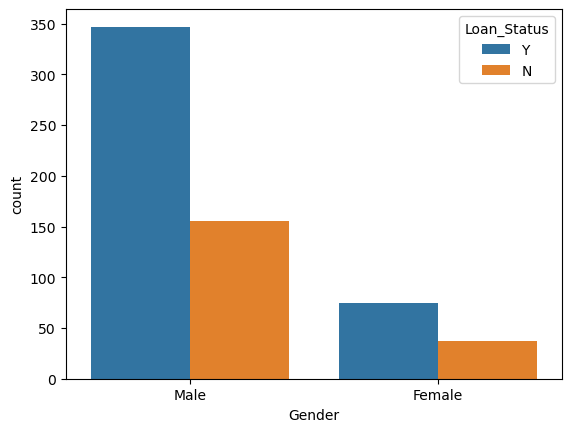

In [26]:
df['Gender'].value_counts()
sns.countplot(x='Gender',hue='Loan_Status',data=df[cat_cols])
plt.show()

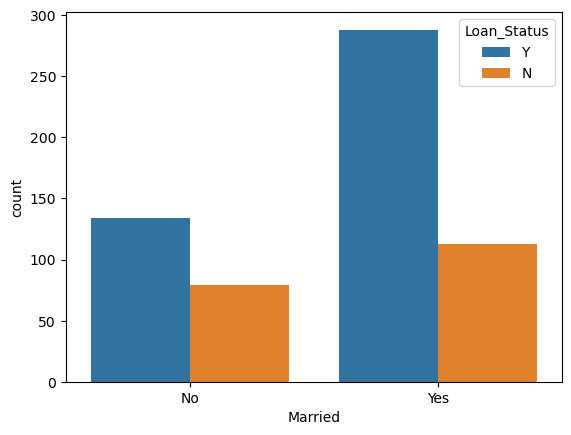

In [27]:
df['Married'].value_counts()
sns.countplot(x='Married',hue='Loan_Status',data=df[cat_cols])
plt.show()

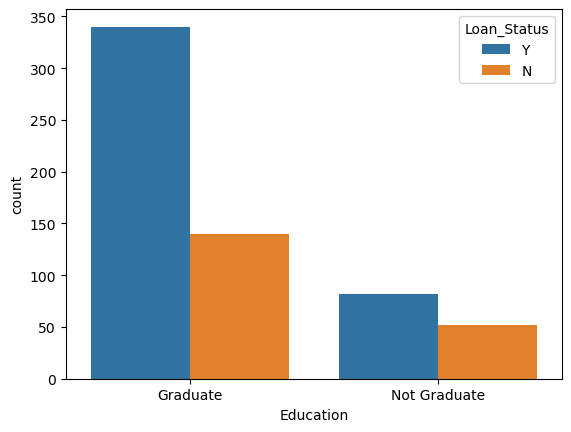

In [28]:
df['Education'].value_counts()
sns.countplot(x='Education',hue='Loan_Status',data=df[cat_cols])
plt.show()

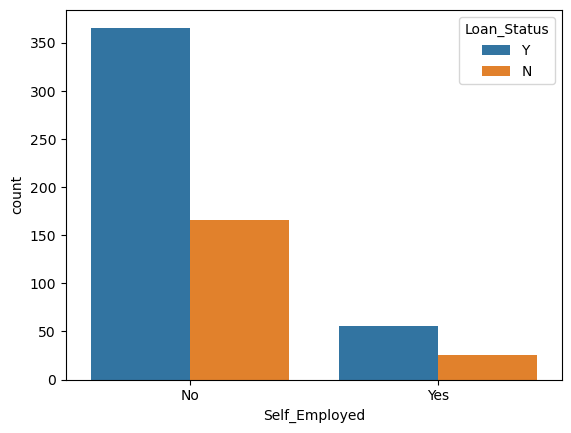

In [29]:
df['Self_Employed'].value_counts()
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df[cat_cols])
plt.show()

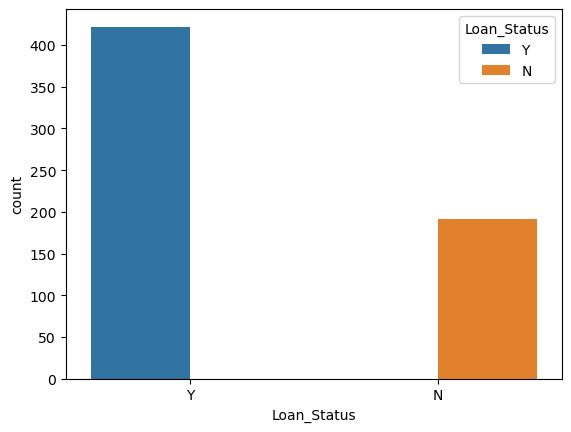

In [30]:
df['Loan_Status'].value_counts()
sns.countplot(x='Loan_Status',hue='Loan_Status',data=df[cat_cols])
plt.show()

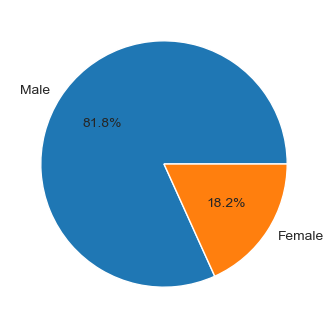

In [31]:
g_counts=df['Gender'].value_counts()
labels = g_counts.index.tolist()
counts = g_counts.values.tolist()

sns.set_style('whitegrid')
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.show()

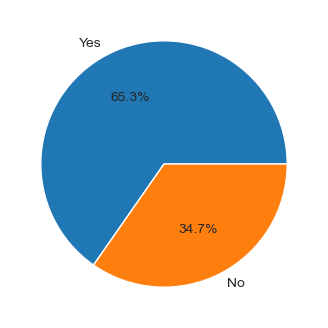

In [32]:
g_counts=df['Married'].value_counts()
labels = g_counts.index.tolist()
counts = g_counts.values.tolist()

sns.set_style('whitegrid')
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.show()

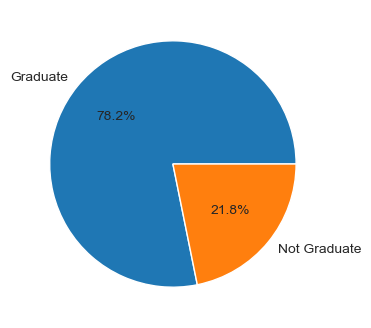

In [33]:
g_counts=df['Education'].value_counts()
labels = g_counts.index.tolist()
counts = g_counts.values.tolist()

sns.set_style('whitegrid')
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.show()

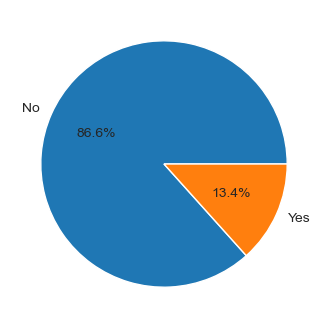

In [34]:
g_counts=df['Self_Employed'].value_counts()
labels = g_counts.index.tolist()
counts = g_counts.values.tolist()

sns.set_style('whitegrid')
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.show()

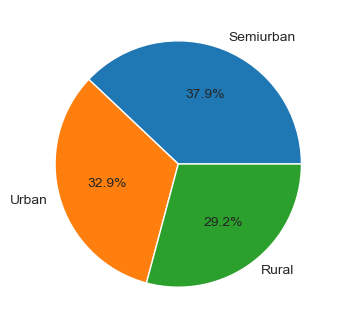

In [35]:
g_counts=df['Property_Area'].value_counts()
labels = g_counts.index.tolist()
counts = g_counts.values.tolist()

sns.set_style('whitegrid')
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.show()

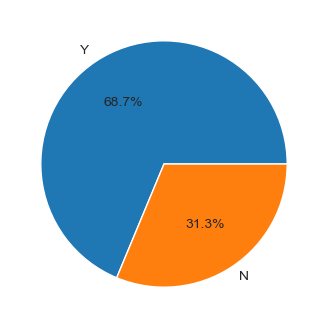

In [36]:
g_counts=df['Loan_Status'].value_counts()
labels = g_counts.index.tolist()
counts = g_counts.values.tolist()

sns.set_style('whitegrid')
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.show()

In [38]:
le=LabelEncoder()
for cols in cat_cols:
    df[cols]=le.fit_transform(df[cols])

In [39]:
df

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1


In [40]:
z=np.abs(zscore(df))
z

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,0.472343,1.372089,0.737806,0.528362,0.392601,0.072991,0.554487,0.211241,0.273231,NaN,1.223298,0.674519
LP001003,0.472343,0.728816,0.253470,0.528362,0.392601,0.134412,0.038732,0.211241,0.273231,NaN,1.318513,1.482537
LP001005,0.472343,0.728816,0.737806,0.528362,2.547117,0.393747,0.554487,0.948996,0.273231,NaN,1.223298,0.674519
LP001006,0.472343,0.728816,0.737806,1.892641,0.392601,0.462062,0.251980,0.306435,0.273231,NaN,1.223298,0.674519
LP001008,0.472343,1.372089,0.737806,0.528362,0.392601,0.097728,0.554487,0.056551,0.273231,NaN,1.223298,0.674519
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,2.117107,1.372089,0.737806,0.528362,0.392601,0.410130,0.554487,0.889500,0.273231,NaN,1.318513,0.674519
LP002979,0.472343,0.728816,2.236021,0.528362,0.392601,0.212557,0.554487,1.258378,2.522836,NaN,1.318513,0.674519
LP002983,0.472343,0.728816,0.253470,0.528362,0.392601,0.437174,0.472404,1.276168,0.273231,NaN,1.223298,0.674519


In [41]:
np.where(z>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
        7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
       dtype=int64))

In [42]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
df2=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

In [43]:
print('Data Loss Percentage after removing Outliers IQR method ',((df.shape[0]-df2.shape[0])/df.shape[0])*100)

Data Loss Percentage after removing Outliers IQR method  66.28664495114006
